In [1]:
import sys
sys.path.append('../src/tl_detector/')

In [2]:
import tl_detector
import scipy.ndimage
import numpy as np
import matplotlib.pyplot as plt
import glob

In [3]:
tlc = tl_detector.TLClassifier()

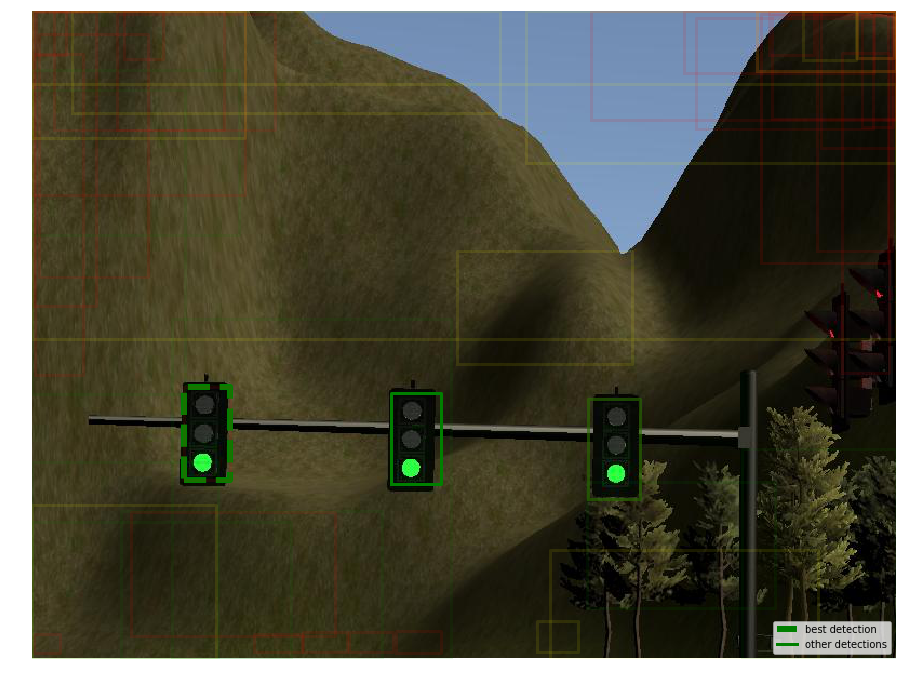

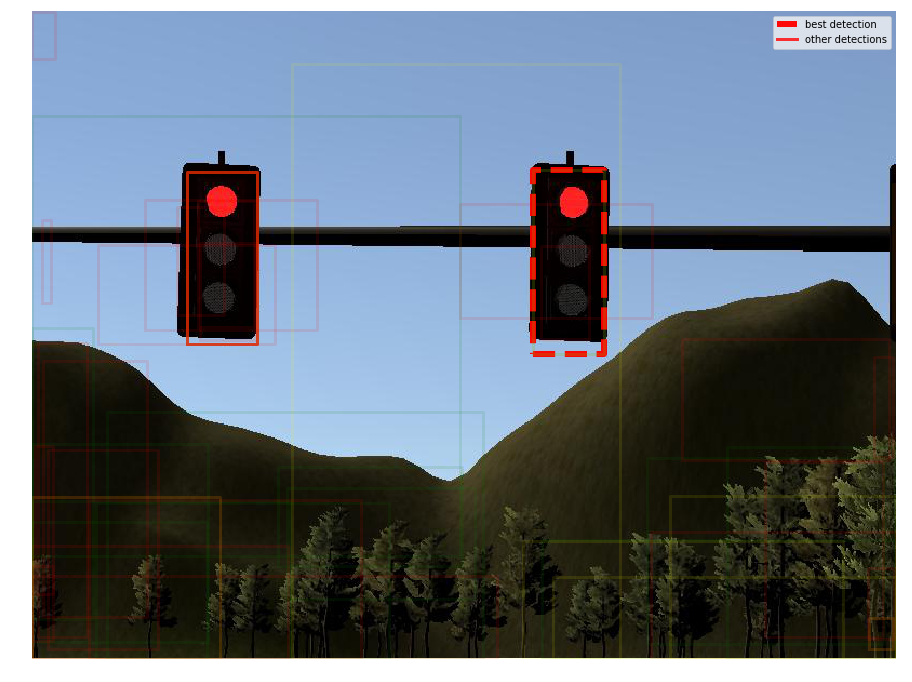

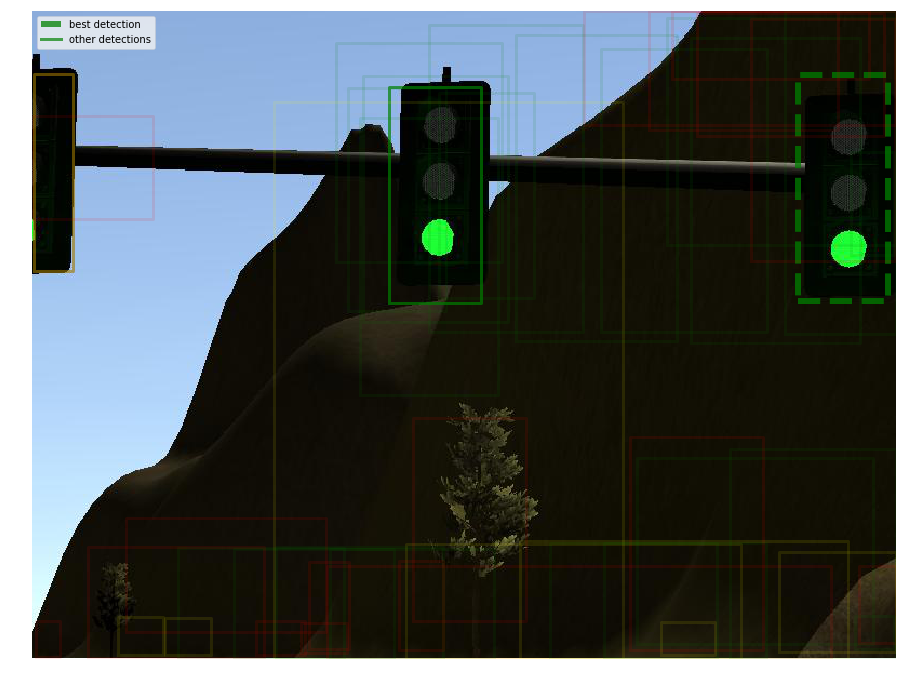

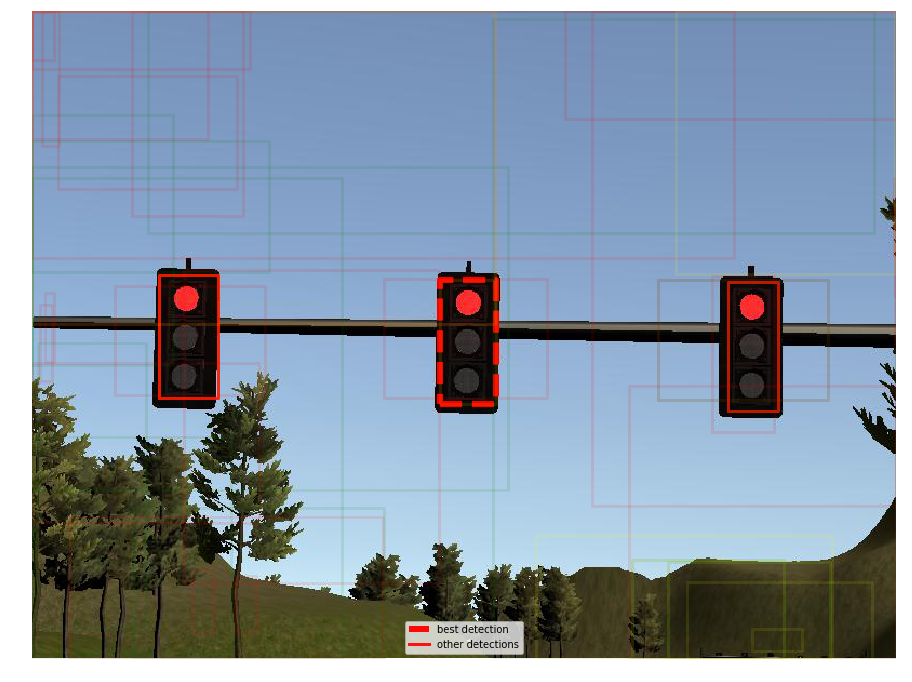

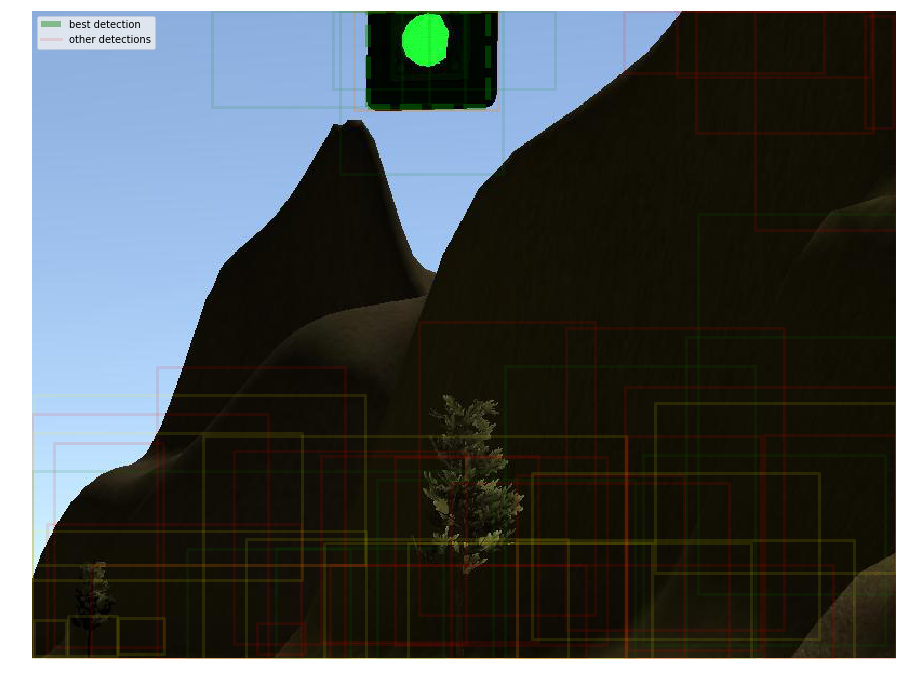

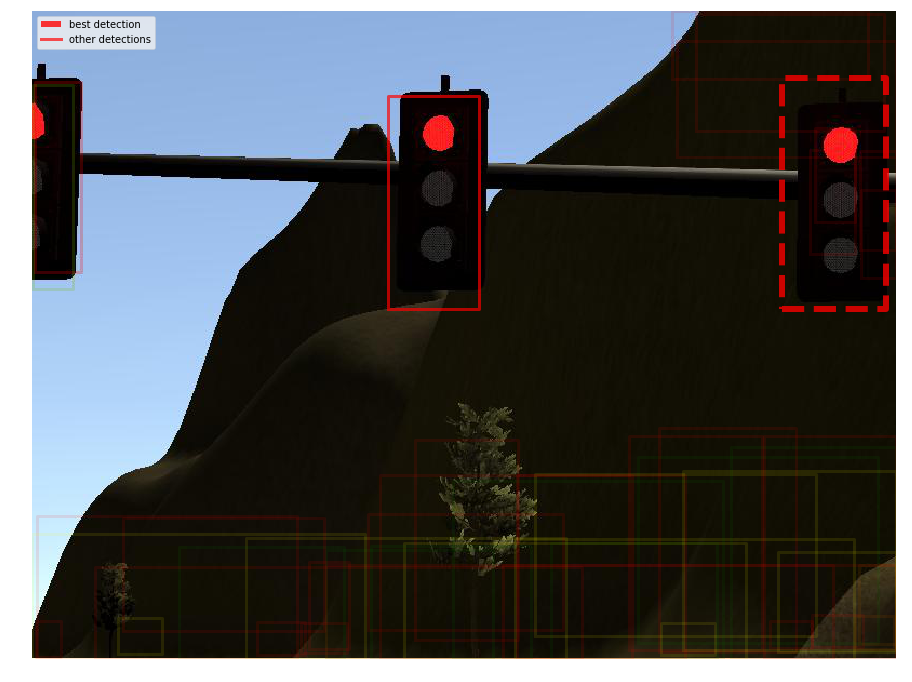

In [4]:
for impath in glob.glob('demo_captures/*.png'):
    if 'detections' in impath:
        continue
    
    image = scipy.ndimage.imread(impath)  

    boxes, scores, classes, num = tlc.get_boxes(image)

#     fig, ax = plt.subplots(figsize=(14, 1))
#     ax.hist(scores, bins=5)
#     ax.set_xlabel('score')
#     ax.set_ylabel('count');

    fig = plt.figure(figsize=(16,9), frameon=False)
    ax = plt.Axes(fig, [0, 0, 1, 1])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(image)

    imax = np.argmax(scores)

    label = 'other detections'
    for i, (box, score, cls) in enumerate(zip(boxes, scores, classes)):

        best = i == imax

        b, l, t, r = box

        b *= image.shape[0]
        t *= image.shape[0]
        l *= image.shape[1]
        r *= image.shape[1]

        ax.plot(
            [l, r, r, l, l], 
            [t, t, b, b, t],
            color=tlc.category_index[cls]['name'],
            alpha=min(score + .1, 1),
            linestyle='--' if best else '-',
            linewidth=6 if best else 3,
            label='best detection' if best else label,
        )
        if not best:
            label = None

    ax.legend(loc='best')

    ax.set_xlim(0, image.shape[1])
    ax.set_ylim(image.shape[0], 0)

    ax.grid(False)
    
    fig.savefig(('%s' % impath).replace('.png', '-detections.png'))